In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
import multiprocessing
from torch import autograd
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.wgan import *
from fasterai.generators import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
torch.cuda.set_device(0)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True


In [ ]:
DATA_PATH = Path('data/imagenet/ILSVRC/Data/CLS-LOC')
TRAIN_SOURCE_PATH = DATA_PATH/'train'
proj_id = 'bw2color'

dpath = DATA_PATH/(proj_id + '_5004_D.h5')
gpath = DATA_PATH/(proj_id + '_5004_G.h5')
keep_pct=1.0
bs=2
sz=224
lr=1e-5
lrs = np.array([lr/1000,lr/100,lr])
torch.backends.cudnn.benchmark=True

## Training

In [ ]:
netG = EDSRImageModifier().cuda()
load_model(netG, gpath)
netD = FeatureCritic(sz).cuda()
load_model(netD, dpath)

In [ ]:
md = get_matched_image_model_data(image_size=sz, batch_size=bs, root_data_path=DATA_PATH, train_root_path=TRAIN_SOURCE_PATH, proj_id=proj_id, keep_pct=keep_pct)

In [ ]:
trainer = WGANTrainer(netD=netD, netG=netG, md=md, bs=bs, sz=sz, dpath=dpath, gpath=gpath)

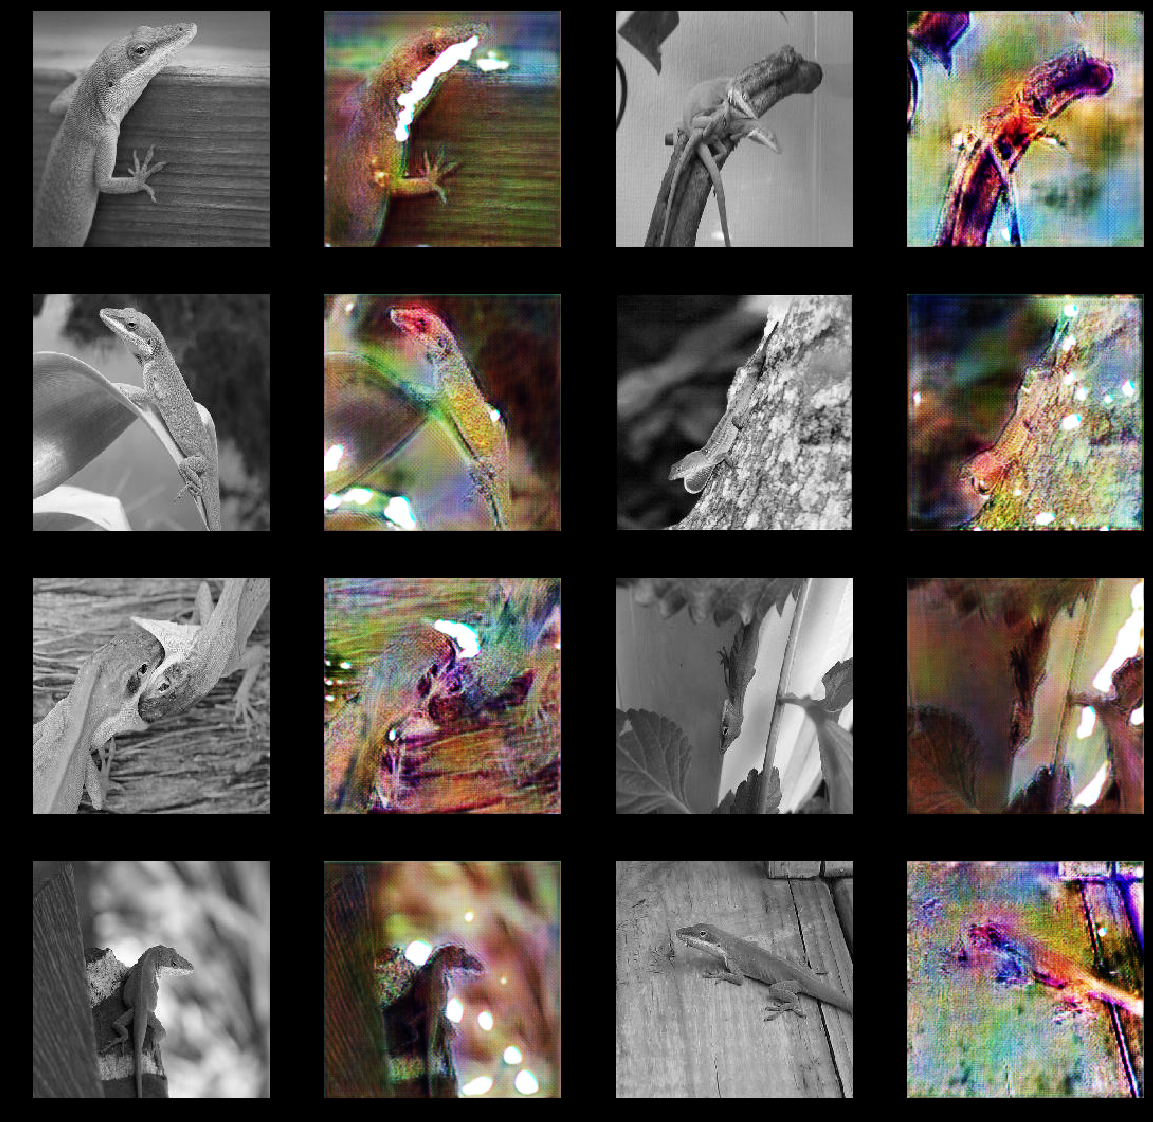

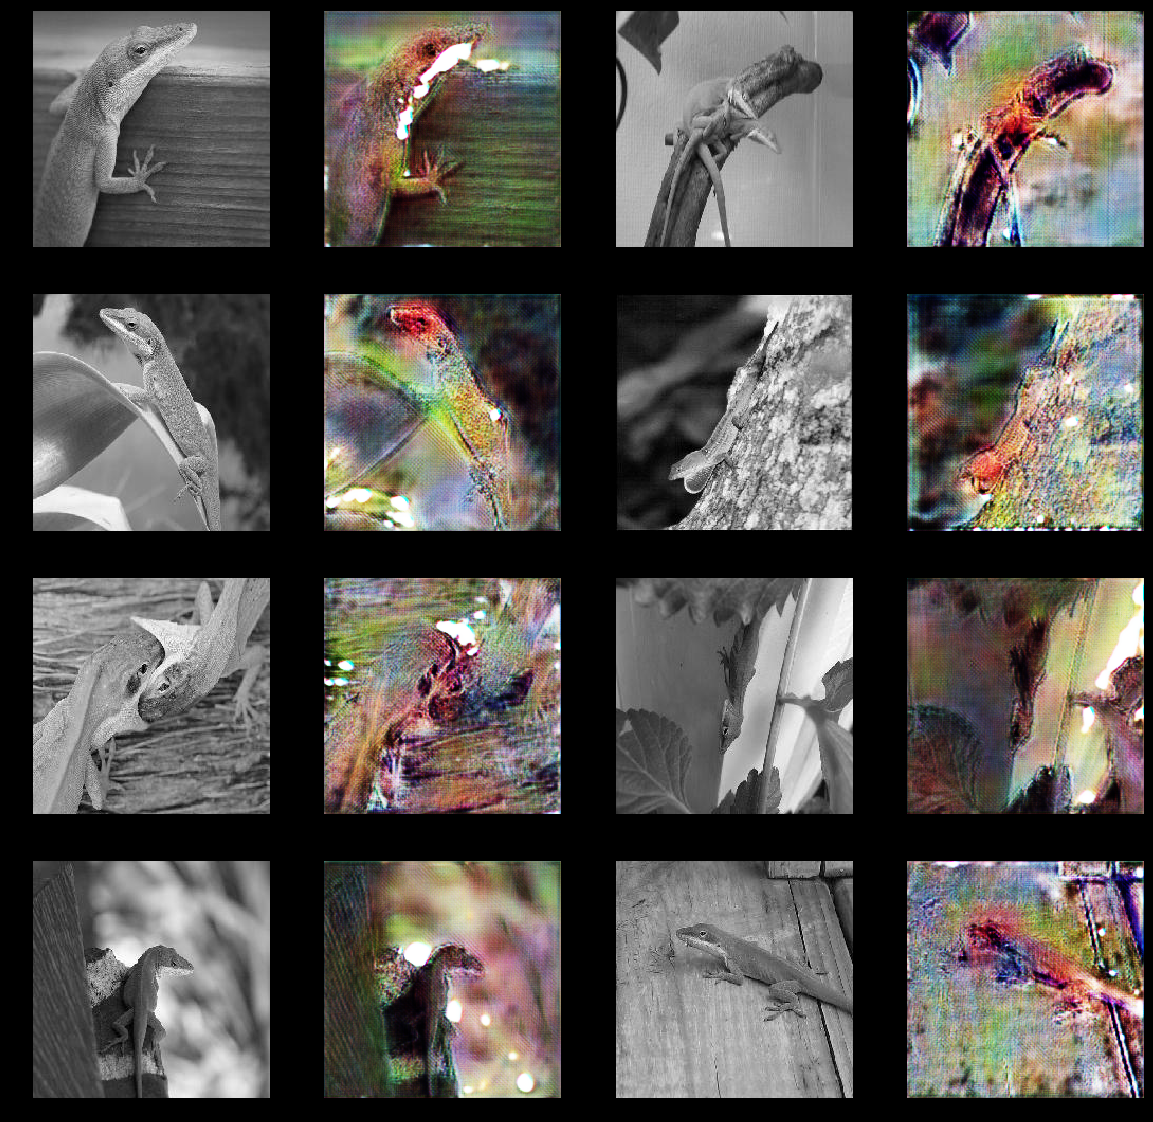

In [ ]:
#netG.freeze_to(1)
#netD.freeze_to(1)
trainer.train(lrs_critic=lrs, lrs_gen=lrs, clr_critic=(5,8), clr_gen=(5,8), cycle_len=1, epochs=1, first=False)